In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapped
from mapped.example_data import mad_points
from mapped.density import GeoKernelDensity, plot_mesh_contour

In [2]:
import pickle
with open("dane_county_land.pkl", 'rb') as f:
    land = pickle.load(f)

In [3]:
gkde = GeoKernelDensity(bandwidth=0.00015).fit(mad_points)

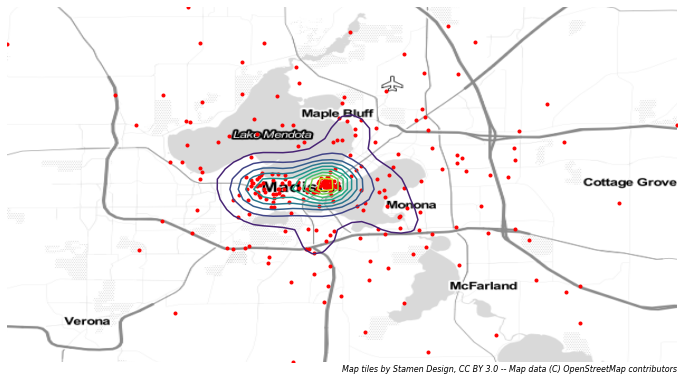

In [4]:
ax = gkde.contour(basemap='Stamen.TonerLite', figsize=(12,12), levels=10)
mad_points.plot(color='red', marker='.', ax=ax );

In [5]:
gkde_m = GeoKernelDensity(bandwidth=0.00015).multifit(mad_points, 'letter')

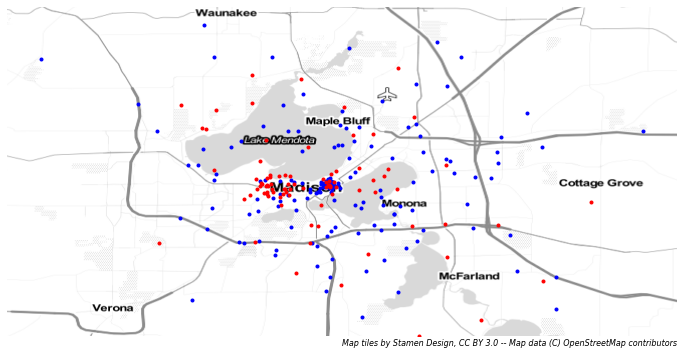

In [6]:
# Visualize two classes of points

ax = mad_points.query("letter=='A'").plot(color='blue', marker='.', basemap='Stamen.TonerLite', figsize=(12,12))
mad_points.query("letter=='B'").plot(color='red', marker='.', ax=ax );


In [7]:
mesh = gkde_m.point_grid(resolution=200, bounds=mad_points, total='TOT')

In [8]:
mask = mesh.within(land.simplify(0.001))

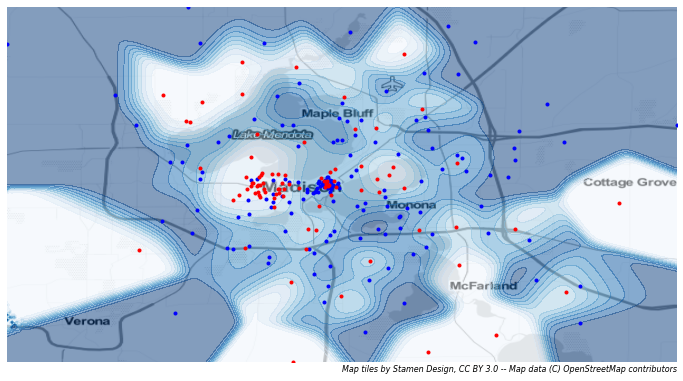

In [9]:
# Plot the relative kernel density of A.
ax = plot_mesh_contour(
    mesh, 'A/TOT', 
    filled=True, 
    alpha=0.5,
    cmap='Blues', 
    basemap='Stamen.TonerLite', 
    levels=10, 
    figsize=(12,12),
)

# Also plot the source points by color.
ax = mad_points.query("letter=='A'").plot(ax=ax, color='blue', marker='.')
ax = mad_points.query("letter=='B'").plot(ax=ax, color='red', marker='.');


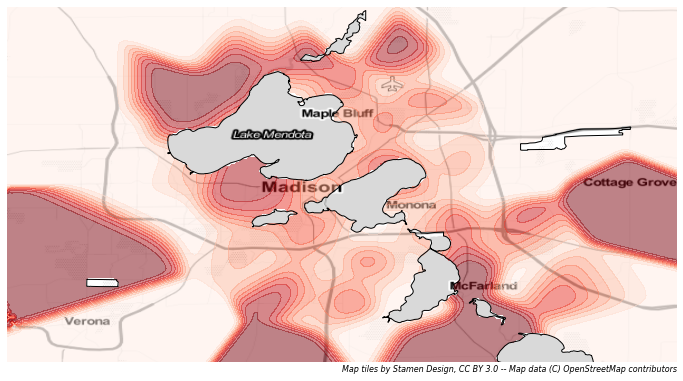

In [10]:
# Plot the relative kernel density of B, masking lakes.
ax = plot_mesh_contour(
    mesh, 'B/TOT', 
    filled=True, 
    alpha=0.5,
    cmap='Reds', 
    basemap='Stamen.TonerLite', 
    levels=10, 
    mask=mask,
    figsize=(12,12),
)

# Draw a black border over lakeshores for a cleaner look.
gpd.GeoDataFrame(
    geometry=[land],
    crs = {'init': 'epsg:4326', 'no_defs': True},
).plot(color="none", edgecolor="black", ax=ax);